In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/KXBTCD-25MAY1400.csv', delimiter=',')
# data = pd.read_csv('data/KXBTCD-25MAY1323.csv', delimiter=',')

# data = pd.read_csv('data/data_log.csv', delimiter=',')

In [2]:
data.head()

,timestamp,product,price,strike,expiration_time,bid_1_price,bid_1_quantity,bid_2_price,bid_2_quantity,bid_3_price,...,ask_1_price,ask_1_quantity,ask_2_price,ask_2_quantity,ask_3_price,ask_3_quantity,ask_4_price,ask_4_quantity,ask_5_price,ask_5_quantity
0,2025-05-14 03:01:39,BRTI,103754.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-05-14 03:01:39,KXBTCD-25MAY1400-T103749.99,NaN,103750.0,2025-05-14 04:05:00+00:00,47.0,523.0,46.0,30.0,43.0,...,56.0,13.0,59.0,30.0,78.0,9.0,79.0,2600.0,80.0,200.0
2,2025-05-14 03:01:39,KXBTCD-25MAY1400-T103499.99,NaN,103500.0,2025-05-14 04:05:00+00:00,77.0,579.0,76.0,30.0,72.0,...,84.0,14.0,89.0,630.0,92.0,22250.0,93.0,4628.0,97.0,80000.0
3,2025-05-14 03:01:39,KXBTCD-25MAY1400-T102499.99,NaN,102500.0,2025-05-14 04:05:00+00:00,84.0,3000.0,71.0,2600.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-05-14 03:01:39,KXBTCD-25MAY1400-T102999.99,NaN,103000.0,2025-05-14 04:05:00+00:00,83.0,3000.0,61.0,2600.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.columns

Index(['timestamp', 'product', 'price', 'strike', 'expiration_time',
       'bid_1_price', 'bid_1_quantity', 'bid_2_price', 'bid_2_quantity',
       'bid_3_price', 'bid_3_quantity', 'bid_4_price', 'bid_4_quantity',
       'bid_5_price', 'bid_5_quantity', 'ask_1_price', 'ask_1_quantity',
       'ask_2_price', 'ask_2_quantity', 'ask_3_price', 'ask_3_quantity',
       'ask_4_price', 'ask_4_quantity', 'ask_5_price', 'ask_5_quantity'],
      dtype='object')

In [4]:
import matplotlib.pyplot as plt
import datetime

In [5]:
datetime.datetime.fromisoformat('2025-05-14 02:03:15')

datetime.datetime(2025, 5, 14, 2, 3, 15)

In [6]:
brti_prices = data[data['product'] == 'BRTI'][['timestamp', 'price']]

brti_prices.reset_index(drop=True, inplace=True)

brti_prices['timestamp'] = brti_prices.apply(lambda x: datetime.datetime.fromisoformat(x['timestamp']), axis=1)
brti_prices['timestamp'] = brti_prices['timestamp'].dt.tz_localize('UTC')


start_time = brti_prices['timestamp'].min()

# turn timestamp into seconds from start_time
brti_prices['seconds'] = brti_prices['timestamp'].apply(lambda x: (x - start_time).total_seconds()).bfill()
# convert to seconds

brti_prices['60s simple average'] = brti_prices['price'].rolling(60).mean().bfill()

window_size = 60

brti_prices['log_returns'] = pd.Series(np.log(brti_prices['price'])).diff()
brti_prices['vol_per_second'] = brti_prices['log_returns'].rolling(window_size).std().bfill()
brti_prices

,timestamp,price,seconds,60s simple average,log_returns,vol_per_second
0,2025-05-14 03:01:39+00:00,103754.47,0.0,103720.467000,NaN,0.000046
1,2025-05-14 03:01:40+00:00,103756.77,1.0,103720.467000,2.216747e-05,0.000046
2,2025-05-14 03:01:41+00:00,103754.31,2.0,103720.467000,-2.370958e-05,0.000046
3,2025-05-14 03:01:43+00:00,103754.77,4.0,103720.467000,4.433541e-06,0.000046
4,2025-05-14 03:01:44+00:00,103754.14,5.0,103720.467000,-6.072028e-06,0.000046
...,...,...,...,...,...,...
3281,2025-05-14 03:59:47+00:00,103578.20,3488.0,103576.884000,-6.371977e-06,0.000013
3282,2025-05-14 03:59:48+00:00,103577.96,3489.0,103576.951000,-2.317093e-06,0.000013
3283,2025-05-14 03:59:49+00:00,103578.05,3490.0,103577.019833,8.689103e-07,0.000013
3284,2025-05-14 03:59:50+00:00,103578.74,3491.0,103577.108167,6.661621e-06,0.000013


In [7]:
data['timestamp'], brti_prices['timestamp']

(0        2025-05-14 03:01:39
 1        2025-05-14 03:01:39
 2        2025-05-14 03:01:39
 3        2025-05-14 03:01:39
 4        2025-05-14 03:01:39
                 ...         
 26280    2025-05-14 03:59:51
 26281    2025-05-14 03:59:51
 26282    2025-05-14 03:59:51
 26283    2025-05-14 03:59:51
 26284    2025-05-14 03:59:51
 Name: timestamp, Length: 26285, dtype: object,
 0      2025-05-14 03:01:39+00:00
 1      2025-05-14 03:01:40+00:00
 2      2025-05-14 03:01:41+00:00
 3      2025-05-14 03:01:43+00:00
 4      2025-05-14 03:01:44+00:00
                   ...           
 3281   2025-05-14 03:59:47+00:00
 3282   2025-05-14 03:59:48+00:00
 3283   2025-05-14 03:59:49+00:00
 3284   2025-05-14 03:59:50+00:00
 3285   2025-05-14 03:59:51+00:00
 Name: timestamp, Length: 3286, dtype: datetime64[ns, UTC])

In [8]:
brti_prices['second_diff'] = brti_prices['seconds'].diff()
brti_prices['price_diff'] = brti_prices['price'].diff()

def get_difference(row):

    if np.isnan(row['second_diff']):
        return np.nan

    if int(row['second_diff']) > 1.5:
        return np.nan
    else:
        return abs(row['price_diff'])

brti_prices['clean_price_diff'] = brti_prices.apply(get_difference, axis=1)

brti_prices['clean_price_diff']

0        NaN
1       2.30
2       2.46
3        NaN
4       0.63
        ... 
3281    0.66
3282    0.24
3283    0.09
3284    0.69
3285    0.30
Name: clean_price_diff, Length: 3286, dtype: float64

In [9]:
new_df = brti_prices
for strike in data['strike'].unique():
    
    if np.isnan(strike):
        continue

    strike_df = data[data['strike'] == strike][['timestamp', 'bid_1_price', 'ask_1_price', 'expiration_time']].copy()

    # Convert `data['timestamp']` to datetime with UTC timezone
    strike_df['timestamp'] = pd.to_datetime(data['timestamp'], utc=True)
    strike_df['expiration_time'] = pd.to_datetime(data['expiration_time'], utc=True)
    strike_df['tte'] = (strike_df['expiration_time'] - strike_df['timestamp']).dt.total_seconds() / 60 / 60 / 24 / 365 # in years
    strike_df.drop(columns=['expiration_time', 'tte'], inplace=True)


    strike_df[f'{strike}_bid_diff'] = strike_df['bid_1_price'].diff()
    strike_df[f'{strike}_ask_diff'] = strike_df['ask_1_price'].diff()

    # change column name to strike_bid_price_1
    strike_df.rename(columns={'bid_1_price': f'{strike}_bid_price_1', 'ask_1_price': f'{strike}_ask_price_1'}, inplace=True)


    new_df = pd.merge(new_df, strike_df, on='timestamp', how='left')


new_df.head(2)

,timestamp,price,seconds,60s simple average,log_returns,vol_per_second,second_diff,price_diff,clean_price_diff,103750.0_bid_price_1,...,103250.0_bid_diff,103250.0_ask_diff,104000.0_bid_price_1,104000.0_ask_price_1,104000.0_bid_diff,104000.0_ask_diff,102750.0_bid_price_1,102750.0_ask_price_1,102750.0_bid_diff,102750.0_ask_diff
0,2025-05-14 03:01:39+00:00,103754.47,0.0,103720.467,NaN,0.000046,NaN,NaN,NaN,47.0,...,NaN,NaN,16.0,27.0,NaN,NaN,84.0,NaN,NaN,NaN
1,2025-05-14 03:01:40+00:00,103756.77,1.0,103720.467,0.000022,0.000046,1.0,2.3,2.3,47.0,...,0.0,0.0,16.0,27.0,0.0,0.0,84.0,NaN,0.0,NaN


# GBM modelling

In [10]:
def gbm_model(price, sigma, start, end, mu=0.0, M=100, strikes=[]):
    n = int(end-start)

    P0 = price 
    dt = 1

    sigma = 0.45 # per year
    sigma = sigma / np.sqrt(365 * 24 * 60 * 60) # per second

    # sim using np 
    St = np.exp(
        (mu - 0.5 * sigma ** 2) * dt 
        + sigma * np.sqrt(dt) * 
        np.random.normal(0, 1, (M, n)).T
    )

    # include array of 1's
    St = np.vstack([np.ones(M), St])

    # multiply through by S0 and return the cumulative product of elements along a given sim path (axis=0)
    St = P0 * np.cumprod(St, axis=0)
    St.shape

    # get last 60 seconds of each sim
    last_60 = St[-60:, :]

    # take mean of last 60 seconds of each sim
    mean_last_60 = np.mean(last_60, axis=0)

    probs = []
    for strike in strikes:
        count = np.sum(mean_last_60 > strike)
        # calculate probability
        prob = count / M
        probs.append(prob)

    return probs

In [11]:
def gbm_terminal_model(price, sigma, T_seconds, mu=0.0, M=100, strikes=[]):
    # Convert annual sigma to per-second
    sigma_sec = sigma / np.sqrt(365 * 24 * 60 * 60)

    # Drift term (can set mu = r for risk-neutral sim)
    drift = (mu - 0.5 * sigma_sec**2) * T_seconds
    diffusion = sigma_sec * np.sqrt(T_seconds)


    # Simulate terminal prices
    Z = np.random.normal(0, 1, M)
    ST = price * np.exp(drift + diffusion * Z)

    # Compute probabilities for binary call options
    probs = []
    for strike in strikes:
        if np.isnan(sigma):
            probs.append(np.nan)
        else:
            prob = np.mean(ST > strike)
            probs.append(prob)

    return probs


In [12]:
brti_prices

,timestamp,price,seconds,60s simple average,log_returns,vol_per_second,second_diff,price_diff,clean_price_diff
0,2025-05-14 03:01:39+00:00,103754.47,0.0,103720.467000,NaN,0.000046,NaN,NaN,NaN
1,2025-05-14 03:01:40+00:00,103756.77,1.0,103720.467000,2.216747e-05,0.000046,1.0,2.30,2.30
2,2025-05-14 03:01:41+00:00,103754.31,2.0,103720.467000,-2.370958e-05,0.000046,1.0,-2.46,2.46
3,2025-05-14 03:01:43+00:00,103754.77,4.0,103720.467000,4.433541e-06,0.000046,2.0,0.46,NaN
4,2025-05-14 03:01:44+00:00,103754.14,5.0,103720.467000,-6.072028e-06,0.000046,1.0,-0.63,0.63
...,...,...,...,...,...,...,...,...,...
3281,2025-05-14 03:59:47+00:00,103578.20,3488.0,103576.884000,-6.371977e-06,0.000013,1.0,-0.66,0.66
3282,2025-05-14 03:59:48+00:00,103577.96,3489.0,103576.951000,-2.317093e-06,0.000013,1.0,-0.24,0.24
3283,2025-05-14 03:59:49+00:00,103578.05,3490.0,103577.019833,8.689103e-07,0.000013,1.0,0.09,0.09
3284,2025-05-14 03:59:50+00:00,103578.74,3491.0,103577.108167,6.661621e-06,0.000013,1.0,0.69,0.69


In [38]:
df = brti_prices.copy()

# Step 1: Make sure timestamp is datetime and sorted
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp').sort_index()

# Step 2: Resample to 1-second intervals and forward-fill missing prices
df = df.resample('1S').ffill()

# Step 3: Compute log returns
df['log_return'] = np.log(df['price']).diff()

# Step 4: Compute rolling realized volatility over a window of seconds
window = 600
seconds_per_year = 365 * 24 * 60 * 60
delta_t = 1 / seconds_per_year

# Annualized rolling standard deviation
df['realized_vol_10min'] = df['log_return'].rolling(window).std() / np.sqrt(delta_t)

df = df.reset_index()

realized_vol_df = df[['timestamp', 'realized_vol_10min']].copy()

df['log_return'] = np.log(df['price']).diff()
df['squared_return'] = df['log_return']**2
span_seconds = 1200  # EMA over 10 minutes = 600s
df['ema_squared_return'] = df['squared_return'].ewm(span=span_seconds, adjust=False).mean()
seconds_per_year = 365 * 24 * 60 * 60
df['ema_realized_vol'] = np.sqrt(df['ema_squared_return']) * np.sqrt(seconds_per_year)

realized_vol = df['log_return'].std() * np.sqrt(seconds_per_year)


df.head(5)
print('Realized volatility', realized_vol)
print(len(df))

Realized volatility 0.17700619878287516
3493


C:\Users\chris\AppData\Local\Temp\ipykernel_15996\4265122795.py:8: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df = df.resample('1S').ffill()


In [39]:
realized_vol

0.17700619878287516

In [40]:
df = brti_prices.copy()

# Step 1: Ensure timestamp is datetime and set index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp').sort_index()

# Step 2: Resample to 1-second intervals and forward-fill missing data
df = df.resample('1S').ffill()

# Step 3: Compute log returns
df['log_return'] = np.log(df['price']).diff()

realized_vol = df['log_return'].std() * np.sqrt(seconds_per_year)
print(f"Realized Annualized Volatility over entire dataset (all quartiles included): {realized_vol:.4f}")

# Step 4: IQR filter to remove outliers in log returns
q25 = df['log_return'].quantile(0.25)
q75 = df['log_return'].quantile(0.75)
filtered_returns = df['log_return'].where((df['log_return'] > q25) & (df['log_return'] < q75))

# Step 5: Compute rolling realized volatility (optional, keep for comparison)
window = 600  # 10 minutes
seconds_per_year = 365 * 24 * 60 * 60
df['realized_vol_10min'] = (
    filtered_returns.rolling('10min').std() * np.sqrt(seconds_per_year)
)
# Step 6: Compute EWMA volatility (HFT-grade)
span_seconds = 600  # ≈10 minutes effective span
df['squared_return'] = filtered_returns**2
df['ema_squared_return'] = df['squared_return'].ewm(span=span_seconds, adjust=False).mean()
df['ema_realized_vol'] = np.sqrt(df['ema_squared_return']) * np.sqrt(seconds_per_year)

# Step 7: Reset index for downstream processing
df = df.reset_index()

# Optional: Extract output DataFrame
realized_vol_df = df[['timestamp', 'realized_vol_10min', 'ema_realized_vol']]
df.head(5)

Realized Annualized Volatility over entire dataset (all quartiles included): 0.1770


C:\Users\chris\AppData\Local\Temp\ipykernel_15996\2281179439.py:8: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df = df.resample('1S').ffill()


,timestamp,price,seconds,60s simple average,log_returns,vol_per_second,second_diff,price_diff,clean_price_diff,log_return,realized_vol_10min,squared_return,ema_squared_return,ema_realized_vol
0,2025-05-14 03:01:39+00:00,103754.47,0.0,103720.467,NaN,0.000046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-05-14 03:01:40+00:00,103756.77,1.0,103720.467,0.000022,0.000046,1.0,2.30,2.30,0.000022,NaN,NaN,NaN,NaN
2,2025-05-14 03:01:41+00:00,103754.31,2.0,103720.467,-0.000024,0.000046,1.0,-2.46,2.46,-0.000024,NaN,NaN,NaN,NaN
3,2025-05-14 03:01:42+00:00,103754.31,2.0,103720.467,-0.000024,0.000046,1.0,-2.46,2.46,0.000000,NaN,0.000000e+00,0.000000e+00,0.000000
4,2025-05-14 03:01:43+00:00,103754.77,4.0,103720.467,0.000004,0.000046,2.0,0.46,NaN,0.000004,0.017605,1.965629e-11,6.541193e-14,0.001436


In [41]:
# find all nan row indexes in expiration time in strike df
nan_indexes = data[data['expiration_time'].isna()].index
# find first non-nan row index in expiration time in strike df
first_non_nan_index = data[data['expiration_time'].notna()].index[0]
# get the expiration time of the first non-nan row
expiration_time = data.loc[first_non_nan_index, 'expiration_time']

expiration_time = pd.to_datetime(expiration_time, utc=True)

In [42]:
from tqdm import tqdm

end = df['seconds'].max()
strikes = data['strike'].unique()[1:]

preds = []
# probabilities for each strike, per timestep

for row in tqdm(df.iterrows()):
    price = row[1]['price']
    # price = row[1]['60s simple average']
    # price = row[1]['60s simple average']
    sigma = 0.1770
    # sigma = row[1]['realized_vol_10min']
    # sigma = row[1]['ema_realized_vol']
    start = row[1]['timestamp']

    T_seconds = int((expiration_time - start).total_seconds())
    
    timestamp = row[1]['timestamp']

    simulated_probs = gbm_terminal_model(price, sigma, T_seconds, mu=0.0, M=1000, strikes=strikes)
    
    preds.append([timestamp] + simulated_probs)      


col_names = ['timestamp'] + [f'{strike}_pred' for strike in strikes]

strike_preds = pd.DataFrame(preds, columns=col_names)

strike_preds.head()

0it [00:00, ?it/s]

3493it [00:00, 9068.44it/s]


,timestamp,103750.0_pred,103500.0_pred,102500.0_pred,103000.0_pred,103250.0_pred,104000.0_pred,102750.0_pred
0,2025-05-14 03:01:39+00:00,0.496,0.886,1.0,1.000,0.992,0.101,1.0
1,2025-05-14 03:01:40+00:00,0.533,0.900,1.0,1.000,0.993,0.122,1.0
2,2025-05-14 03:01:41+00:00,0.487,0.884,1.0,1.000,0.988,0.118,1.0
3,2025-05-14 03:01:42+00:00,0.508,0.897,1.0,0.999,0.995,0.111,1.0
4,2025-05-14 03:01:43+00:00,0.495,0.888,1.0,1.000,0.997,0.116,1.0


In [43]:
import numpy as np
from scipy.stats import norm

def binary_call_black_scholes(S0, K, sigma, r, T):
    d2 = (np.log(S0 / K) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return np.exp(-r * T) * norm.cdf(d2)

In [44]:
strike_df = data[data['strike'] == strike][['timestamp', 'strike', 'bid_1_price', 'ask_1_price', 'expiration_time']]

strike_df.reset_index(drop=True, inplace=True)

strike_df['timestamp'] = pd.to_datetime(strike_df['timestamp'], utc=True)
strike_df['expiration_time'] = pd.to_datetime(strike_df['expiration_time'], utc=True)

# find all nan row indexes in expiration time in strike df
nan_indexes = strike_df[strike_df['expiration_time'].isna()].index
# find first non-nan row index in expiration time in strike df
first_non_nan_index = strike_df[strike_df['expiration_time'].notna()].index[0]
# get the expiration time of the first non-nan row
expiration_time = strike_df.loc[first_non_nan_index, 'expiration_time']
# set all nans in expiration time to the expiration time of the first non-nan row
strike_df.loc[nan_indexes, 'expiration_time'] = expiration_time
strike_df['tte'] = (strike_df['expiration_time'] - strike_df['timestamp']).dt.total_seconds() / 60/ 60 / 24 / 365

strike_df

,timestamp,strike,bid_1_price,ask_1_price,expiration_time,tte
0,2025-05-14 03:01:39+00:00,102750.0,84.0,NaN,2025-05-14 04:05:00+00:00,0.000121
1,2025-05-14 03:01:40+00:00,102750.0,84.0,NaN,2025-05-14 04:05:00+00:00,0.000120
2,2025-05-14 03:01:41+00:00,102750.0,84.0,NaN,2025-05-14 04:05:00+00:00,0.000120
3,2025-05-14 03:01:43+00:00,102750.0,84.0,NaN,2025-05-14 04:05:00+00:00,0.000120
4,2025-05-14 03:01:44+00:00,102750.0,84.0,NaN,2025-05-14 04:05:00+00:00,0.000120
...,...,...,...,...,...,...
3281,2025-05-14 03:59:47+00:00,102750.0,90.0,NaN,2025-05-14 04:05:00+00:00,0.000010
3282,2025-05-14 03:59:48+00:00,102750.0,90.0,NaN,2025-05-14 04:05:00+00:00,0.000010
3283,2025-05-14 03:59:49+00:00,102750.0,90.0,NaN,2025-05-14 04:05:00+00:00,0.000010
3284,2025-05-14 03:59:50+00:00,102750.0,90.0,NaN,2025-05-14 04:05:00+00:00,0.000010


In [45]:
def effective_sigma(T, sigma_annual, beta=0.01, floor=0.05, T0=30/365):
    # Avoid negative or zero T
    if T <= 0:
        return sigma_annual * floor
    scaling = (T / T0) ** beta
    return sigma_annual * max(scaling, floor)

import numpy as np
from scipy.stats import norm
from scipy.optimize import brentq

def binary_call_price(S0, K, sigma, r, T):
    if T <= 0 or S0 <= 0 or K <= 0 or sigma <= 0:
        return np.nan
    d2 = (np.log(S0 / K) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return np.exp(-r * T) * norm.cdf(d2)

def implied_vol_binary_call(S0, K, market_price, r, T, tol=1e-6, max_iter=100):
    # Objective: find sigma such that BS binary call price matches market price
    def objective(sigma):
        return binary_call_price(S0, K, sigma, r, T) - market_price

    try:
        # Use Brent's method between a very small vol and high vol (e.g., 0.001 to 5.0)
        return brentq(objective, 1e-6, 5.0, xtol=tol, maxiter=max_iter)
    except ValueError:
        # No root found within range
        return np.nan

def moneyness(S0, K, tte):
    return np.log(S0 / K) / np.sqrt(tte)

def binary_call_delta(S, K, T, r, sigma):
    d2 = (np.log(S / K) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return np.exp(-r * T) * norm.pdf(d2) / (S * sigma * np.sqrt(T))

def binary_call_gamma(S, K, T, r, sigma):
    d2 = (np.log(S / K) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    numerator = -np.exp(-r * T) * norm.pdf(d2) * (d2 + sigma * np.sqrt(T))
    denominator = S**2 * sigma**2 * T
    return numerator / denominator

def binary_call_vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return -np.exp(-r * T) * norm.pdf(d2) * d1 / sigma

import numpy as np
from scipy.stats import norm

def binary_call_theta(S, K, T, sigma, r):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    term1 = -(S * sigma * norm.pdf(d1)) / (2 * np.sqrt(T))
    term2 = r * np.exp(-r * T) * norm.cdf(d2)

    return term1 + term2


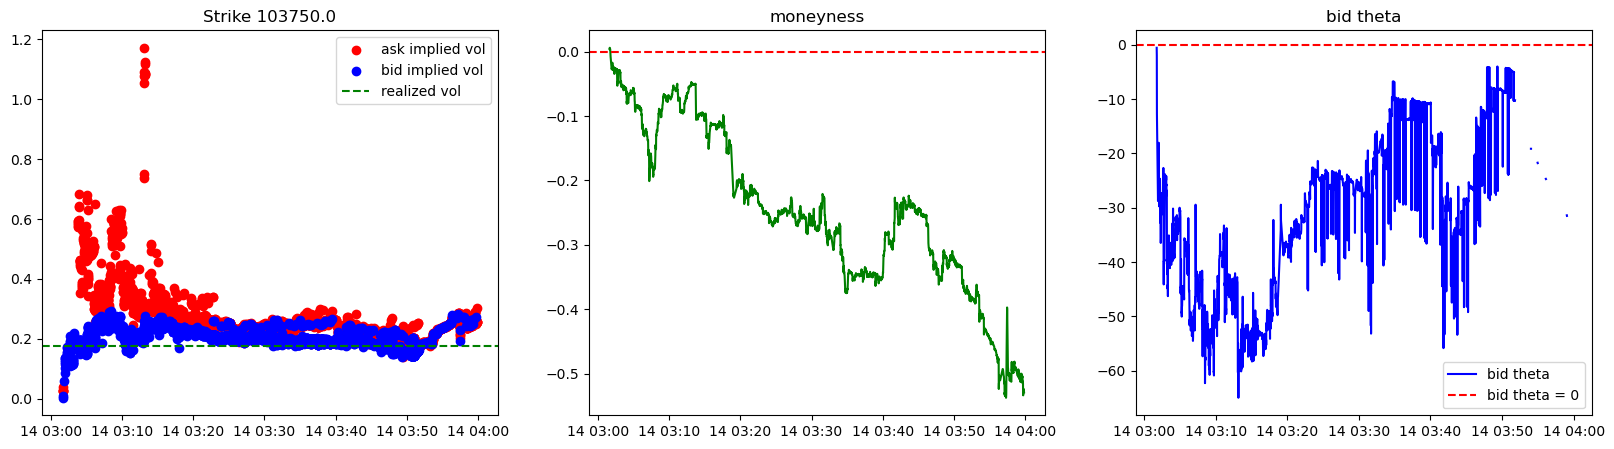

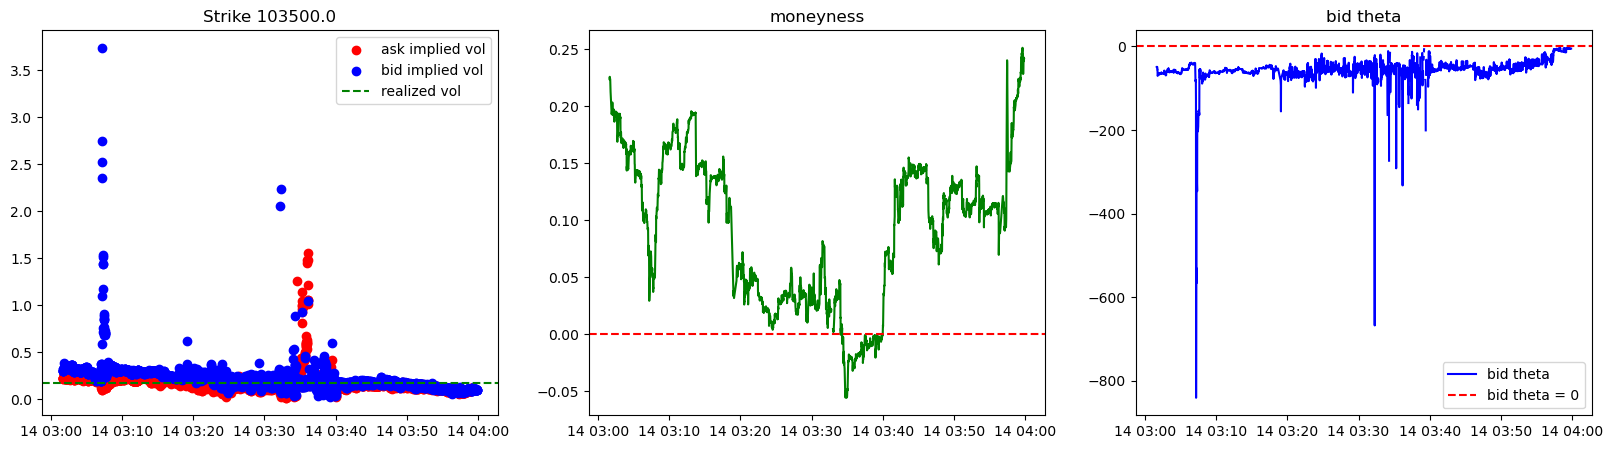

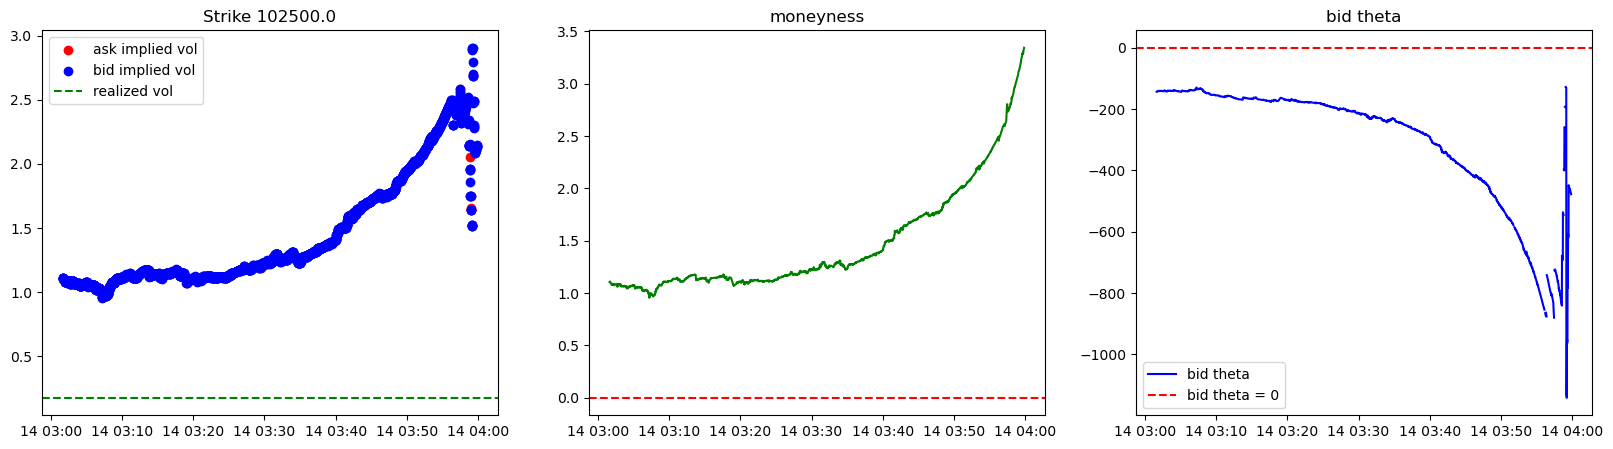

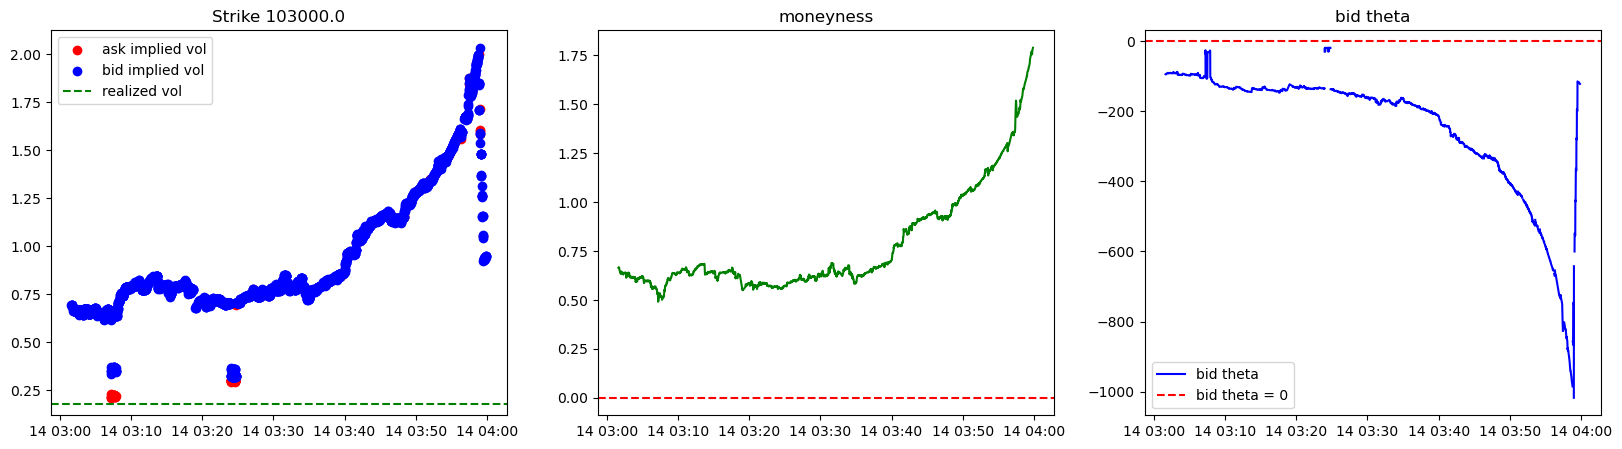

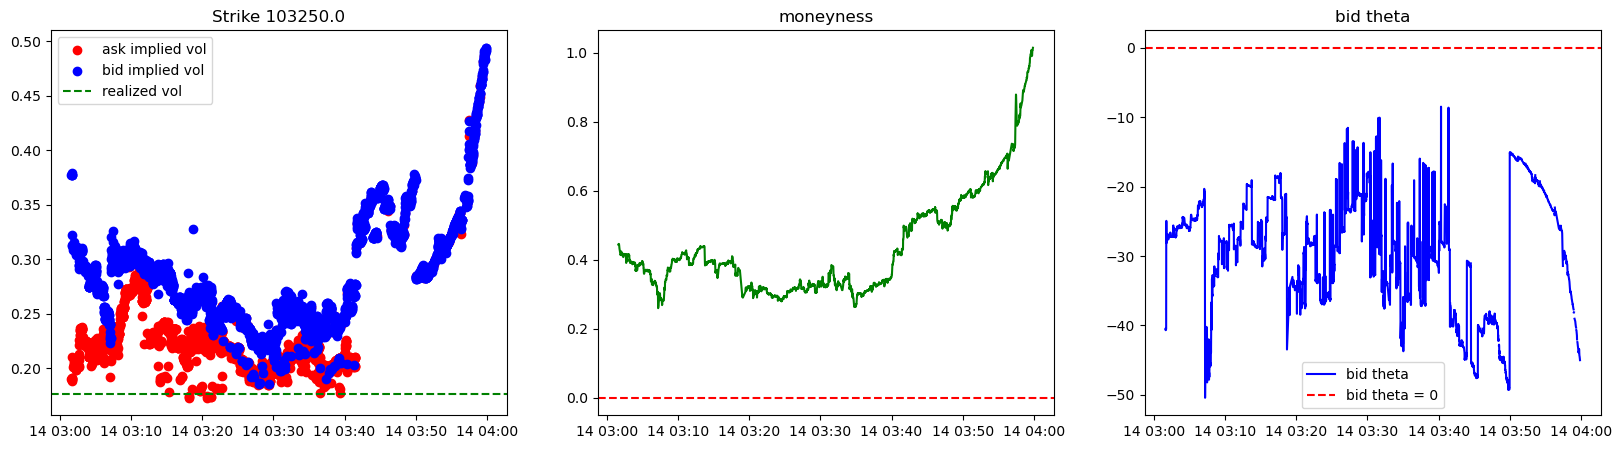

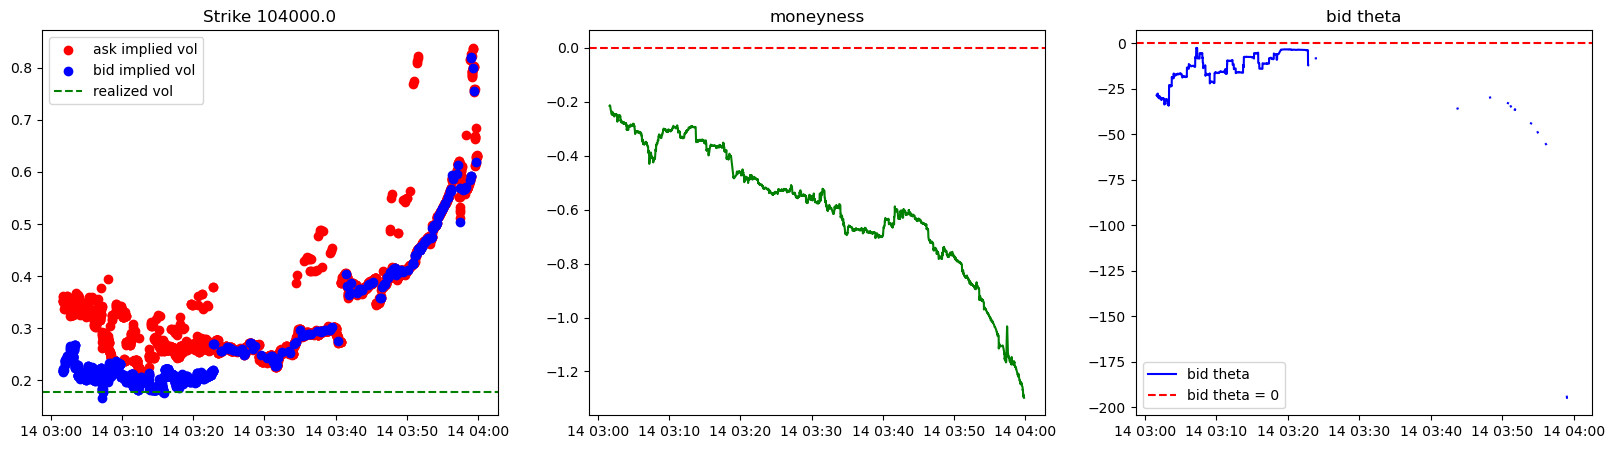

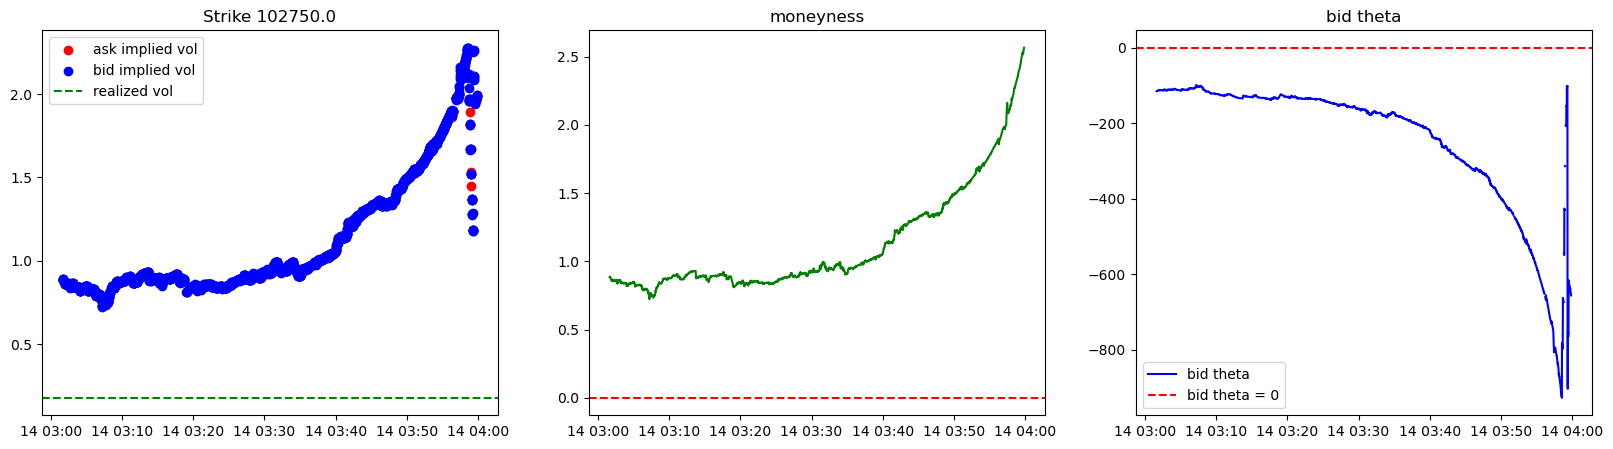

In [58]:
all_dfs = {}
for strike in strikes:
    # Filter the data for the specific strike
    strike_df = data[data['strike'] == strike][['timestamp', 'strike', 'bid_1_price', 'ask_1_price', 'expiration_time']]

    underlying_data = brti_prices[['timestamp', 'price', '60s simple average']]

    underlying_data.reset_index(drop=True, inplace=True)
    strike_df.reset_index(drop=True, inplace=True)

    strike_df['timestamp'] = pd.to_datetime(strike_df['timestamp'], utc=True)
    strike_df['expiration_time'] = pd.to_datetime(strike_df['expiration_time'], utc=True)

    # find all nan row indexes in expiration time in strike df
    nan_indexes = strike_df[strike_df['expiration_time'].isna()].index
    # find first non-nan row index in expiration time in strike df
    first_non_nan_index = strike_df[strike_df['expiration_time'].notna()].index[0]
    # get the expiration time of the first non-nan row
    expiration_time = strike_df.loc[first_non_nan_index, 'expiration_time']
    # set all nans in expiration time to the expiration time of the first non-nan row
    strike_df.loc[nan_indexes, 'expiration_time'] = expiration_time
    strike_df['tte'] = (strike_df['expiration_time'] - strike_df['timestamp']).dt.total_seconds() / 60 / 60 / 24 / 365 # in years


    merged_df = pd.merge(underlying_data, strike_df, on='timestamp', how='left')
    merged_df['strike_pred'] = strike_preds[f'{strike}_pred'] * 100
    
    # calculate mid price, but only if both bid and ask prices are not NaN
    # if either bid or ask price is NaN, set mid price to NaN
    merged_df['mid_price'] = np.where(
        merged_df['bid_1_price'].isna() | merged_df['ask_1_price'].isna(),
        np.nan,
        (merged_df['bid_1_price'] + merged_df['ask_1_price']) / 2
    )

    merged_df['iv'] = merged_df.apply(
        lambda x: implied_vol_binary_call(
            # S0=x['price'],
            S0=x['60s simple average'],
            K=strike,
            market_price=x[f'mid_price'] / 100,
            r=0.,
            T=x['tte']
        ),
        axis=1
    )

    merged_df['bid_iv'] = merged_df.apply(
        lambda x: implied_vol_binary_call(
            S0=x['price'],
            # S0=x['60s simple average'],
            K=strike,
            market_price=x[f'bid_1_price'] / 100,
            r=0.,
            T=x['tte']
        ),
        axis=1
    )
    
    merged_df['ask_iv'] = merged_df.apply(
        lambda x: implied_vol_binary_call(
            S0=x['price'],
            # S0=x['60s simple average'],
            K=strike,
            market_price=x[f'ask_1_price'] / 100,
            r=0.,
            T=x['tte']
        ),
        axis=1
    )

    merged_df['bid_theta'] = merged_df.apply(
        lambda x: binary_call_theta(
            S=x['price'],
            K=strike,
            T=x['tte'],
            sigma=x['bid_iv'],
            r=0.0
        ),
        axis=1
    )

    merged_df['ask_theta'] = merged_df.apply(
        lambda x: binary_call_theta(
            S=x['price'],
            K=strike,
            T=x['tte'],
            sigma=x['ask_iv'],
            r=0.0
        ),
        axis=1
    )

    merged_df['moneyness'] = merged_df.apply(
        lambda x: np.log(x['price'] / strike) / np.sqrt(x['tte']),
        axis=1)

    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    # plot bid and asks versus predicted strikes
    plt.title(f'Strike {strike}')
    plt.scatter(merged_df['timestamp'], merged_df['ask_iv'], label='ask implied vol', color='red')
    plt.scatter(merged_df['timestamp'], merged_df['bid_iv'], label='bid implied vol', color='blue')
    plt.axhline(y=realized_vol, color='green', linestyle='--', label='realized vol')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    plt.title("moneyness")
    plt.plot(merged_df['timestamp'], merged_df['moneyness'], label='moneyness', color='green')
    plt.axhline(y=0, color='red', linestyle='--', label='moneyness = 0')

    plt.subplot(1, 3, 3)
    # bid theta
    plt.title("bid theta")

    hourly_theta = merged_df['bid_theta'] / 365 / 24 

    plt.plot(merged_df['timestamp'], hourly_theta, label='bid theta', color='blue')
    plt.axhline(y=0, color='red', linestyle='--', label='bid theta = 0')
    plt.legend()


    plt.show()


    # plt.plot(merged_df['timestamp'], merged_df['bid_1_price'], label='Underlying Price', color='blue')
    # plt.plot(merged_df['timestamp'], merged_df['ask_1_price'], label='Strike Price', color='red')
    # plt.plot(merged_df['timestamp'], merged_df['binary_call_bs'], label='BS Prediction', color='green')
    # plt.title(f'Strike Price Prediction vs Underlying Price for Strike {strike}')
    # plt.xlabel('Timestamp')
    # plt.ylabel('Price')
    # plt.legend()
    # plt.show()

    all_dfs[strike] = merged_df

(3286,) (3286,)
(3286,) (3286,)
(3286,) (3286,)
(3286,) (3286,)
(3286,) (3286,)
(3286,) (3286,)
(3286,) (3286,)


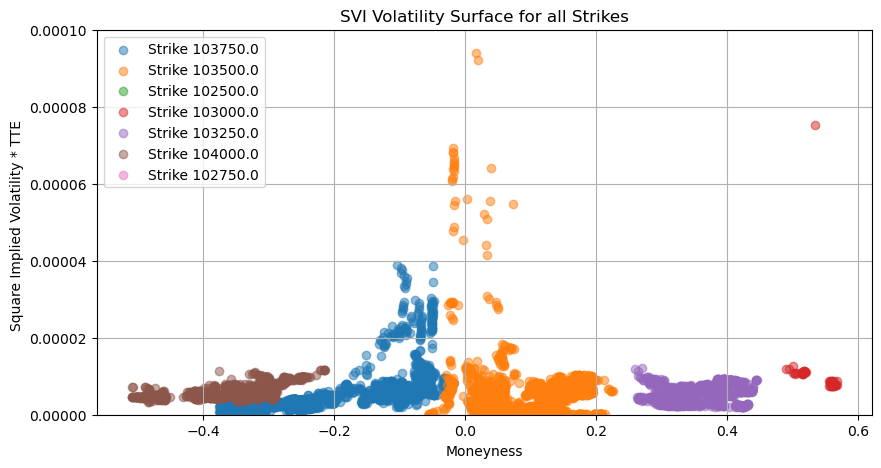

In [ ]:
plt.figure(figsize=(10, 5))
# plt.xlabel('Log(S/K)/sqrt(TTE)')
# plt.ylabel('Implied Volatility')


plt.title(f'SVI Volatility Surface for all Strikes')
plt.xlabel('Moneyness')
plt.ylabel('Square Implied Volatility * TTE ')
plt.grid()


for strike, merged_df in all_dfs.items():
    Y = np.square(merged_df['iv'].values) * merged_df['tte'].values
    X = merged_df['moneyness'].values
    print(X.shape, Y.shape)
    plt.scatter(X, Y, marker='o', label=f'Strike {strike}', alpha=0.5)

    # plt.scatter(merged_df['m_t'], merged_df['iv'], alpha=0.5, label=f'Strike {strike}')

plt.ylim(0, 0.0001)
plt.legend()
plt.show()

## simulating GBM paths

In [ ]:
import numpy as np

# Assume brti_prices is your DataFrame and has 'price' as the column
log_prices = np.log(brti_prices['price'].values)
log_returns = np.diff(log_prices)

# Time delta between samples (1 second in years)
delta_t = 1 / (365 * 24 * 60 * 60)

# Annualized volatility (already given or estimated elsewhere)
# Example: sigma = 0.6
# Make sure sigma is annualized
# If you need to estimate sigma from the data:
sigma = np.std(log_returns, ddof=1) / np.sqrt(delta_t)

# Estimate drift μ (annualized)
mu = np.mean(log_returns) / delta_t + 0.5 * sigma**2

print("Estimated annualized drift (mu):", mu)
print("Estimated annualized volatility (sigma):", sigma)


Estimated annualized drift (mu): -16.284554823457846
Estimated annualized volatility (sigma): 0.18249819284273774


In [687]:
def gbm_model(price, sigma, start, end, strike, mu=0.0, M=1000):
    n = int((end-start).total_seconds())
    
    P0 = price 
    dt = 1


    sigma = sigma / np.sqrt(365 * 24 * 60 * 60) # assuming sigma is annualized
    mu = mu / np.sqrt(365 * 24 * 60 * 60) # assuming mu is annualized
    # sim using np 

    # sim using np 
    St = np.exp(
        (mu - 0.5 * sigma ** 2) * dt 
        + sigma * np.sqrt(dt) * 
        np.random.normal(0, 1, (M, n)).T
    )

    # include array of 1's
    St = np.vstack([np.ones(M), St])

    # multiply through by S0 and return the cumulative product of elements along a given sim path (axis=0)
    St = P0 * np.cumprod(St, axis=0)
    
    # get last 60 seconds of each sim
    last_60 = St[-60:, :]

    # take mean of last 60 seconds of each sim
    mean_last_60 = np.mean(last_60, axis=0)
 
    # count how many times the mean last 60 seconds is greater than the strike
    count = np.sum(mean_last_60 > strike)
    # calculate probability
    prob = count / M


    return prob

# manual gbm modelling

In [ ]:
df = strike_data.head(1)

tte = (df['expiration_time'] - df['timestamp']).apply(lambda x: x.total_seconds())
spot = df['spot'].values[0]

dt = 1 # every second

sigma = 0.4 / np.sqrt(365 * 24 * 60 * 60)
mu = 0

# sim using np 
St = np.exp(
    (mu - 0.5 * sigma ** 2) * dt 
    + sigma * np.sqrt(dt) * 
    np.random.normal(0, 1, (M, n)).T
)

# multiply through by S0 and return the cumulative product of elements along a given sim path (axis=0)
St = P0 * np.cumprod(St, axis=0)

# get last 60 seconds of each sim
last_60 = St[-60:, :]

mean_last_60 = np.mean(last_60, axis=0)

for strike in sorted(data['strike'].unique()):
    if np.isnan(strike):
        continue
    
    # count how many times the mean last 60 seconds is greater than the strike
    count = np.sum(mean_last_60 > strike)
    # calculate probability
    prob = count / M
    print(f"Strike: {strike}, Probability: {prob*100:.2f}%")

In [594]:
# calculate each timestep
dt = 1 # every second

# sim using np 
St = np.exp(
    (mu - 0.5 * sigma ** 2) * dt 
    + sigma * np.sqrt(dt) * 
    np.random.normal(0, 1, (M, n)).T
)

# include array of 1's
St = np.vstack([np.ones(M), St])

# multiply through by S0 and return the cumulative product of elements along a given sim path (axis=0)
St = P0 * np.cumprod(St, axis=0)
St.shape

# get last 60 seconds of each sim
last_60 = St[-60:, :]

# take mean of last 60 seconds of each sim
mean_last_60 = np.mean(last_60, axis=0)

for strike in data['strike'].unique():
    if np.isnan(strike):
        continue
    
    # count how many times the mean last 60 seconds is greater than the strike
    count = np.sum(mean_last_60 > strike)
    # calculate probability
    prob = count / M
    print(f"Strike: {strike}, Probability: {prob*100:.2f}%")

Strike: 103750.0, Probability: 47.90%
Strike: 103500.0, Probability: 70.70%
Strike: 102500.0, Probability: 100.00%
Strike: 103000.0, Probability: 96.10%
Strike: 103250.0, Probability: 87.60%
Strike: 104000.0, Probability: 28.20%
Strike: 102750.0, Probability: 99.40%


Text(0, 0.5, 'Price ($)')

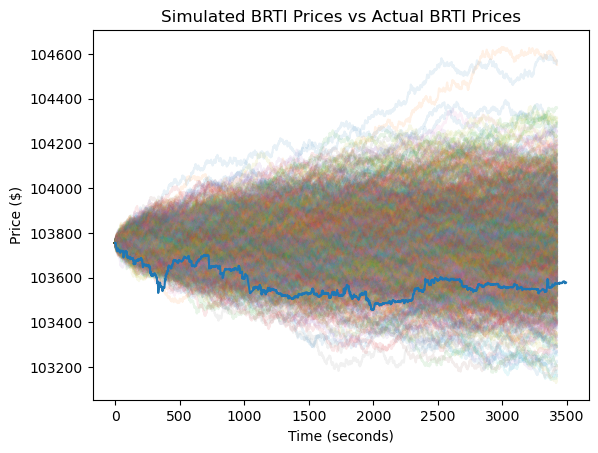

In [515]:
plt.plot(St, alpha=0.1)
plt.plot(brti_prices['seconds'], brti_prices['price'])
plt.title("Simulated BRTI Prices vs Actual BRTI Prices")
plt.xlabel("Time (seconds)")
plt.ylabel("Price ($)")